# División del DataSet

En este NoteBook se muestran algunos de los mecanismos màs utilizados para la division del DataSet.

### Descripciòn

ISCX NSL-KDD dataset 2009 

We apologize, this dataset is no longer available.

ISCX NSL-KDD is a data set suggested to solve some of the inherent problems of the KDD'99 data set which are mentioned in [1]. Although, this new version of the KDD data set still suffers from some of the problems discussed by McHugh and may not be a perfect representative of existing real networks, because of the lack of public data sets for network-based IDSs, we believe it still can be applied as an effective benchmark data set to help researchers compare different intrusion detection methods.

Furthermore, the number of records in the NSL-KDD train and test sets are reasonable. This advantage makes it affordable to run the experiments on the complete set without the need to randomly select a small portion. Consequently, evaluation results of different research work will be consistent and comparable.

Data files

* <span style="color:green">KDDTrain+.ARFF: The full NSL-KDD train set with binary labels in ARFF format</span>
* KDDTrain+.TXT: The full NSL-KDD train set including attack-type labels and difficulty level in CSV format
* KDDTrain+_20Percent.ARFF: A 20% subset of the KDDTrain+.arff file
* KDDTrain+_20Percent.TXT: A 20% subset of the KDDTrain+.txt file
* KDDTest+.ARFF: The full NSL-KDD test set with binary labels in ARFF format
* KDDTest+.TXT: The full NSL-KDD test set including attack-type labels and difficulty level in CSV format
* KDDTest-21.ARFF: A subset of the KDDTest+.arff file which does not include records with difficulty level of 21 out of 21
* KDDTest-21.TXT: A subset of the KDDTest+.txt file which does not include records with difficulty level of 21 out of 21

Improvements to the KDD'99 dataset

The ISCX NSL-KDD data set has the following advantages over the original KDD data set:

    It does not include redundant records in the train set, so the classifiers will not be biased towards more frequent records.
    There is no duplicate records in the proposed test sets; therefore, the performance of the learners are not biased by the methods which have better detection rates on the frequent records.
    The number of selected records from each difficultylevel group is inversely proportional to the percentage of records in the original KDD data set. As a result, the classification rates of distinct machine learning methods vary in a wider range, which makes it more efficient to have an accurate evaluation of different learning techniques.
    The number of records in the train and test sets are reasonable, which makes it affordable to run the experiments on the complete set without the need to randomly select a small portion. Consequently, evaluation results of different research works will be consistent and comparable.

Statistical observations

One of the most important deficiencies in the KDD data set is the huge number of redundant records, which causes the learning algorithms to be biased towards the frequent records, and thus prevent them from learning unfrequent records which are usually more harmful to networks such as U2R and R2L attacks. In addition, the existence of these repeated records in the test set will cause the evaluation results to be biased by the methods which have better detection rates on the frequent records.

In addition, we analyzed the difficulty level of the records in KDD data set. Surprisingly, about 98% of the records in the train set and 86% of the records in the test set were correctly classified with all the 21 learners.

In order to perform our experiments, we randomly created three smaller subsets of the KDD train set each of which included fifty thousand records of information. Each of the learners where trained over the created train sets. We then employed the 21 learned machines (7 learners, each trained 3 times) to label the records of the entire KDD train and test sets, which provides us with 21 predicated labels for each record. Further, we annotated each record of the data set with a #successfulPrediction value, which was initialized to zero. Now, since the KDD data set provides the correct label for each record, we compared the predicated label of each record given by a specific learner with the actual label, where we incremented #successfulPrediction by one if a match was found. Through this process, we calculated the number of learners that were able to correctly label that given record. The highest value for #successfulPrediction is 21, which conveys the fact that all learners were able to correctly predict the label of that record.
Statistics of redundant records in the KDD train set

Original records | Distinct records | Reduction rate

    Attacks: 3,925,650 | 262,178 | 93.32%
    Normal: 972,781 | 812,814 | 16.44%
    Total: 4,898,431 | 1,074,992 | 78.05%

Statistics of redundant records in the KDD test set

Original records | Distinct records | Reduction rate

    Attacks: 250,436 | 29,378 | 88.26%
    Normal: 60,591 | 47,911 | 20.92%
    Total: 311,027 | 77,289 | 75.15%

License

You may redistribute, republish, and mirror the ISCX NSL-KDD dataset in any form. However, any use or redistribution of the data must include a citation to the NSL-KDD dataset and the paper referenced below.

References: [1] M. Tavallaee, E. Bagheri, W. Lu, and A. Ghorbani, “A Detailed Analysis of the KDD CUP 99 Data Set,” Submitted to Second IEEE Symposium on Computational Intelligence for Security and Defense Applications (CISDA), 2009.

**University Of New Brunswick :** [ISCX NSL-KDD dataset 2009](https://www-unb-ca.translate.goog/cic/datasets/nsl.html?_x_tr_sl=en&_x_tr_tl=es&_x_tr_hl=es&_x_tr_pto=tc)

## 1.- Lectura del DataSet

In [1]:
import arff
import pandas as pd

In [2]:
def load_kdd_dataset(data_path):
    """Lectura del DataSet NSL-KDD"""
    with open(data_path, "r") as train_set:
        dataset = arff.load(train_set)
        attributes = [attr[0] for attr in dataset["attributes"]]
        return pd.DataFrame(dataset["data"], columns=attributes)

In [3]:
df = load_kdd_dataset("/home/luca544/Documentos/Despliegues_Simulacion/Division_DataSet/datasets/datasets/NSL-KDD/KDDTrain_reducido.arff")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     1000 non-null   float64
 1   protocol_type                1000 non-null   object 
 2   service                      1000 non-null   object 
 3   flag                         1000 non-null   object 
 4   src_bytes                    1000 non-null   float64
 5   dst_bytes                    1000 non-null   float64
 6   land                         1000 non-null   object 
 7   wrong_fragment               1000 non-null   float64
 8   urgent                       1000 non-null   float64
 9   hot                          1000 non-null   float64
 10  num_failed_logins            1000 non-null   float64
 11  logged_in                    1000 non-null   object 
 12  num_compromised              1000 non-null   float64
 13  root_shell         

## 2.- División del DataSet

Se debe separar el DataSet en los diferentes subconjuntos necesarios para realizar los procesos de entrenamiento, validaciòn y pruebas. Sklearn implementa la funciòn **train_test_split**.

In [5]:
# Separar el DataSet 60% train set, 40% test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.4, random_state=42)

In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 24 to 102
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     600 non-null    float64
 1   protocol_type                600 non-null    object 
 2   service                      600 non-null    object 
 3   flag                         600 non-null    object 
 4   src_bytes                    600 non-null    float64
 5   dst_bytes                    600 non-null    float64
 6   land                         600 non-null    object 
 7   wrong_fragment               600 non-null    float64
 8   urgent                       600 non-null    float64
 9   hot                          600 non-null    float64
 10  num_failed_logins            600 non-null    float64
 11  logged_in                    600 non-null    object 
 12  num_compromised              600 non-null    float64
 13  root_shell              

In [7]:
# Separar el DataSet de Pruebas 50% validation set, 50% test set
val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=42)

In [8]:
print("Longitud del Train Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Train Set: 600
Longitud del Validation Set: 200
Longitud del Test Set: 200


### 3.- Particionado Aleatorio y Stratified Sampling

Sklearn implementa la función **train_test_split**, sin embargo, esta función por defecto realiza un particionado del DataSet aleatorio para cada vez que se ejecuta el script. Aun añadiendo una semilla fija e aleatoria, cada vez que se cargue de nuevo del DataSet se generan nuevos subconjuntos. Esto puede ocasionar que despues de muchoas intentos, el algoritmo "vea" todo el DataSet.

Para solucionar este problema, Sklearn ha introducido el parámetro **Shufffle** en la función **train_test_split**.

In [9]:
# Si Shuffle=False, el DataSet no mezclara antes del particionado.
train_set, test_set = train_test_split(df, test_size=0.4, random_state=42, shuffle=False)

Estos métodos para dividir el DataSet estan bien si se tiene un conjunto de datos muy grande, pero si no se tiene, se corre el riesgo de introducir **Sampling Bias**.

Para evitar esto, se utiliza un método de Sampling que se llama **Stratified Sampling**. La población dividida en subconjuntos homogéneos llamados **Strata**. El objetivo es que no quede ninguna caracteristica del DataSet sin representación en ninguno de los conjuntos de datos para una o más caracteristicas en particular.

Sklearn introduce el parametro **Stratify** en la función **train_test_split** para controlar este comportamiento.

_This Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the propotion of values provided to parameter stratify._

_For example, if variable "y" is binary categorical variable with value 0 and 1 and there are 25% of zeros and 75% of ones, stratify = y will make sure that your random split has tenga 25% of 0´s and 75% 1's._

https://stackoverflow.com/questions

In [10]:
train_set, test_set = train_test_split(df, test_size=0.4, random_state=42, stratify=df["protocol_type"])

## 4.- Generación de una Función de particionado

In [11]:
# Construcción de una función que realice el particionado completo.
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
    test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return(train_set, val_set, test_set)


In [12]:
print("Longitud del DataSet: ", len(df))

Longitud del DataSet:  1000


In [13]:
train_set, val_set, test_set = train_val_test_split(df, stratify="protocol_type")

In [14]:
print("Longitud del Train Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Train Set: 600
Longitud del Validation Set: 200
Longitud del Test Set: 200


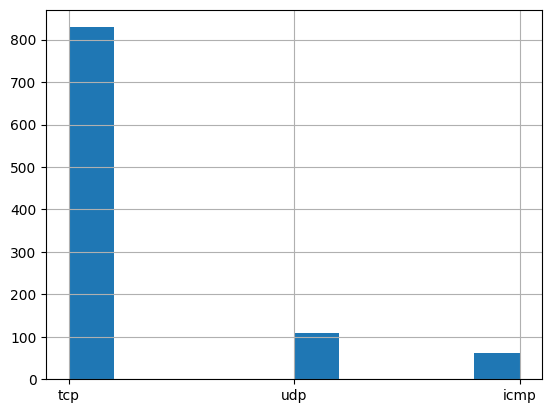

In [15]:
# Comparación de que Stratify mantiene la proporción de la característica en los conjuntos.
%matplotlib inline
import matplotlib.pyplot as plt
df["protocol_type"].hist()
plt.show()

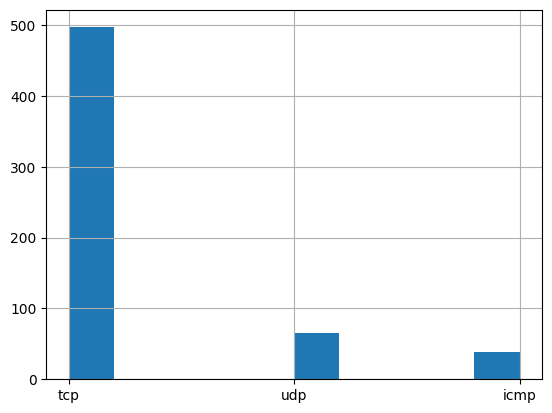

In [16]:
train_set["protocol_type"].hist()
plt.show()

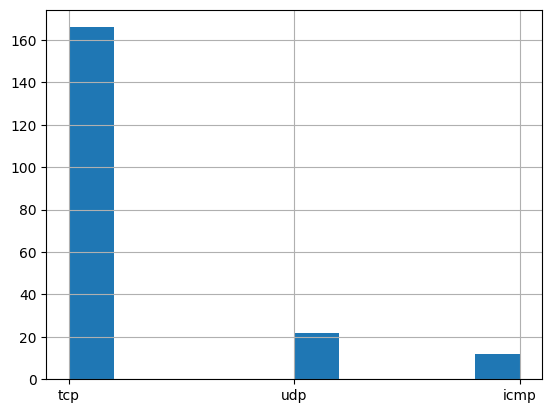

In [17]:
val_set["protocol_type"].hist()
plt.show()

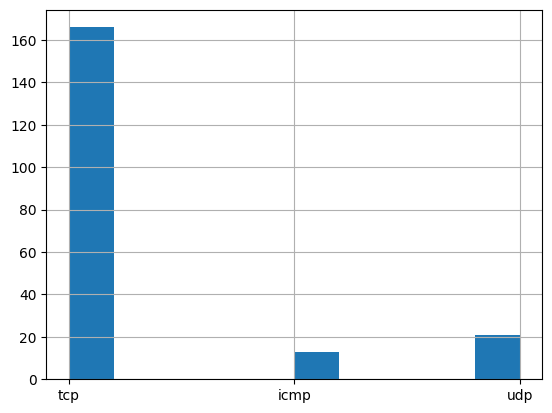

In [18]:
test_set["protocol_type"].hist()
plt.show()